In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [2]:
bostonds = load_boston()
bostonds

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
bostonds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
bostonds.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
bostonds.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Exploracion de datos con Pandas Dataframe

In [6]:
data = pd.DataFrame(data = bostonds.data, columns = bostonds.feature_names)
data["Price"] = bostonds.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizacion de datos

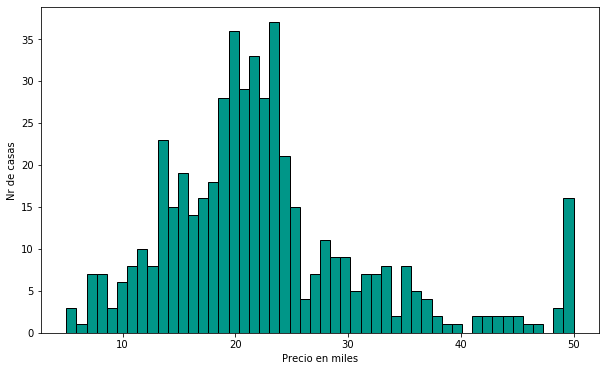

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data["Price"], bins=50, ec = 'black', color= '#009688')
plt.xlabel('Precio en miles')
plt.ylabel('Nr de casas')
plt.show()

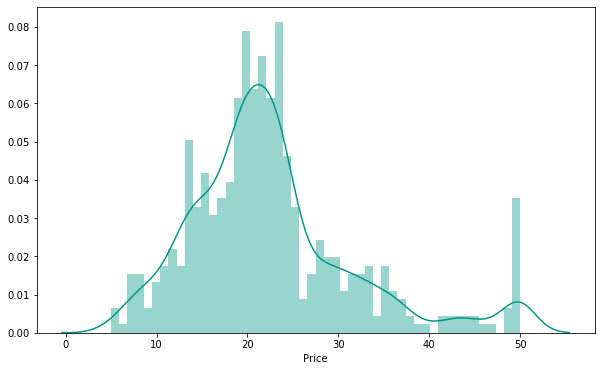

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(data["Price"], bins=50, color='#009688')
plt.show()

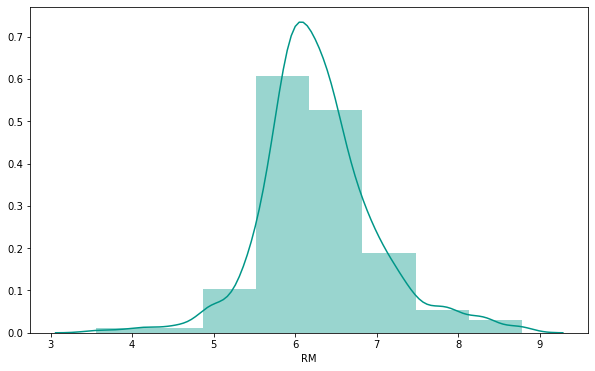

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(data["RM"], bins= 8, color='#009688')
plt.show()

In [11]:
data["RM"].mean()

6.284634387351779

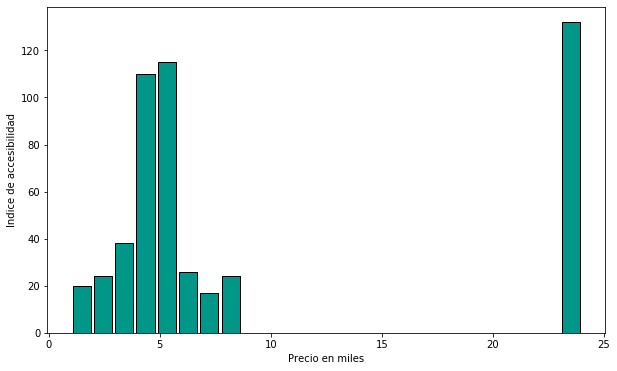

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data["RAD"], bins=24, ec = 'black', color= '#009688', rwidth=0.85)
plt.xlabel('Precio en miles')
plt.ylabel('Indice de accesibilidad')
plt.show()

In [13]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

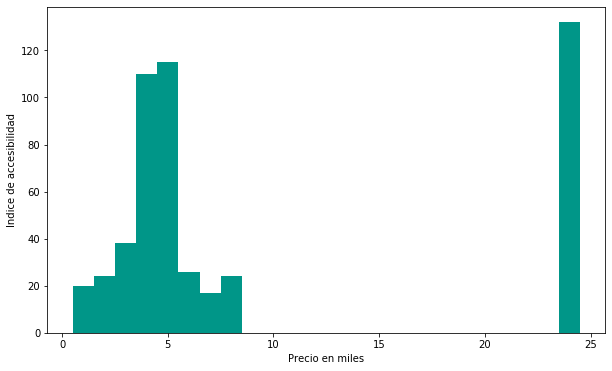

In [14]:
frecuency = data['RAD'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(frecuency.index, height=frecuency, width=1,color= '#009688')
plt.xlabel('Precio en miles')
plt.ylabel('Indice de accesibilidad')
plt.show()

In [15]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Estadisticas descriptivas

In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
data["Price"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

## Correlation
## $$ \rho _{XY} = corr(X,Y) $$

In [18]:
data["Price"].corr(data["RM"])

0.6953599470715396

In [19]:
data["Price"].corr(data["PTRATIO"])

-0.5077866855375618

In [20]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

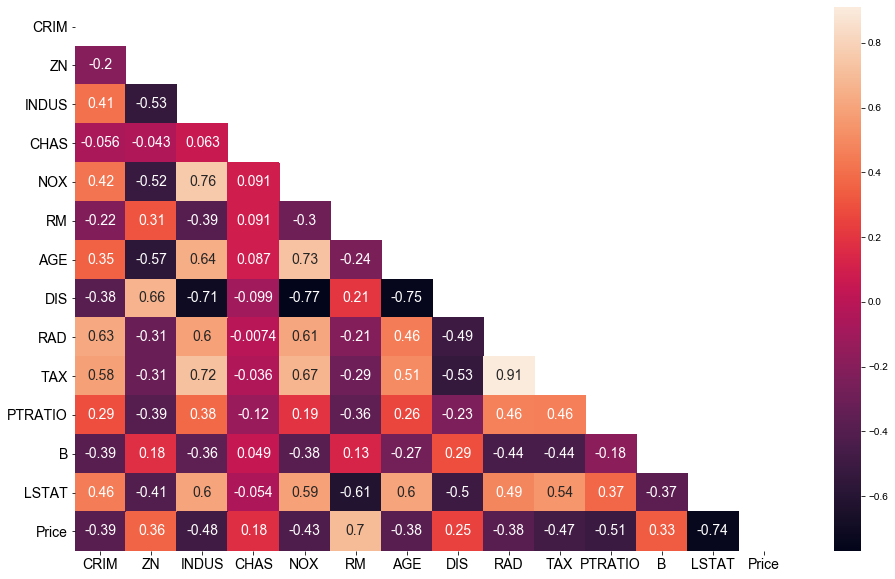

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask= mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [22]:
# El metodo de pearson no es valido para el calculo de correlacion de variables
# discretas.

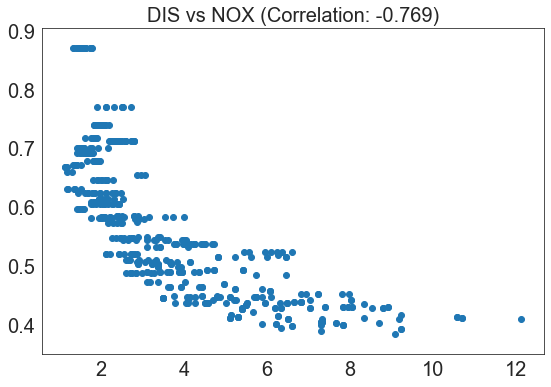

In [23]:

nox_dis_corr = round(data["NOX"].corr(data["DIS"]),3)

plt.figure(figsize=(9,6))
plt.scatter(data["DIS"], data["NOX"])
plt.title(f'DIS vs NOX (Correlation: {nox_dis_corr})', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


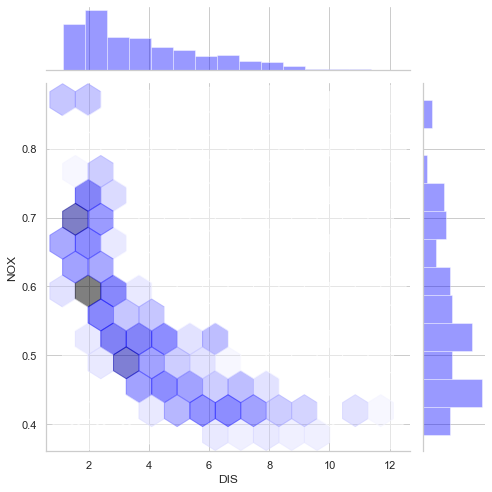

In [24]:
sns.set()
sns.set_style('whitegrid')
sns.jointplot(data["DIS"],data["NOX"], size=7, color="blue",kind="hex", joint_kws={'alpha':0.5})
plt.show()

c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


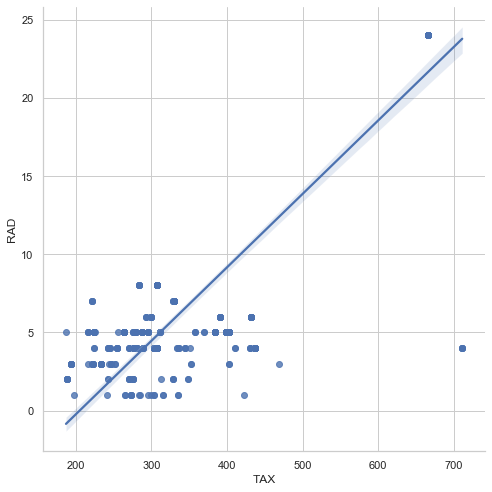

In [25]:
sns.lmplot(x="TAX", y ="RAD", data=data, size=7)

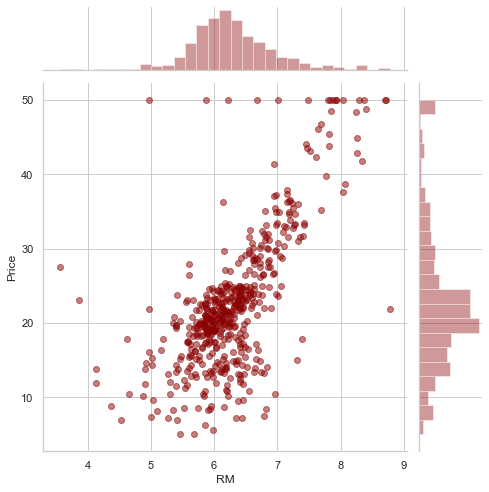

In [26]:
sns.set()
sns.set_style('whitegrid')
sns.jointplot(data["RM"],data["Price"], size=7, color="darkred", joint_kws={'alpha':0.5})
plt.show()

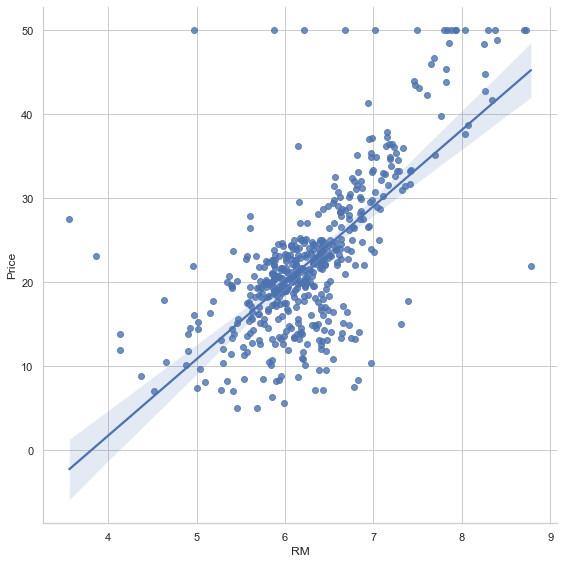

In [27]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x="RM", y="Price", data=data, size=8)
plt.show()

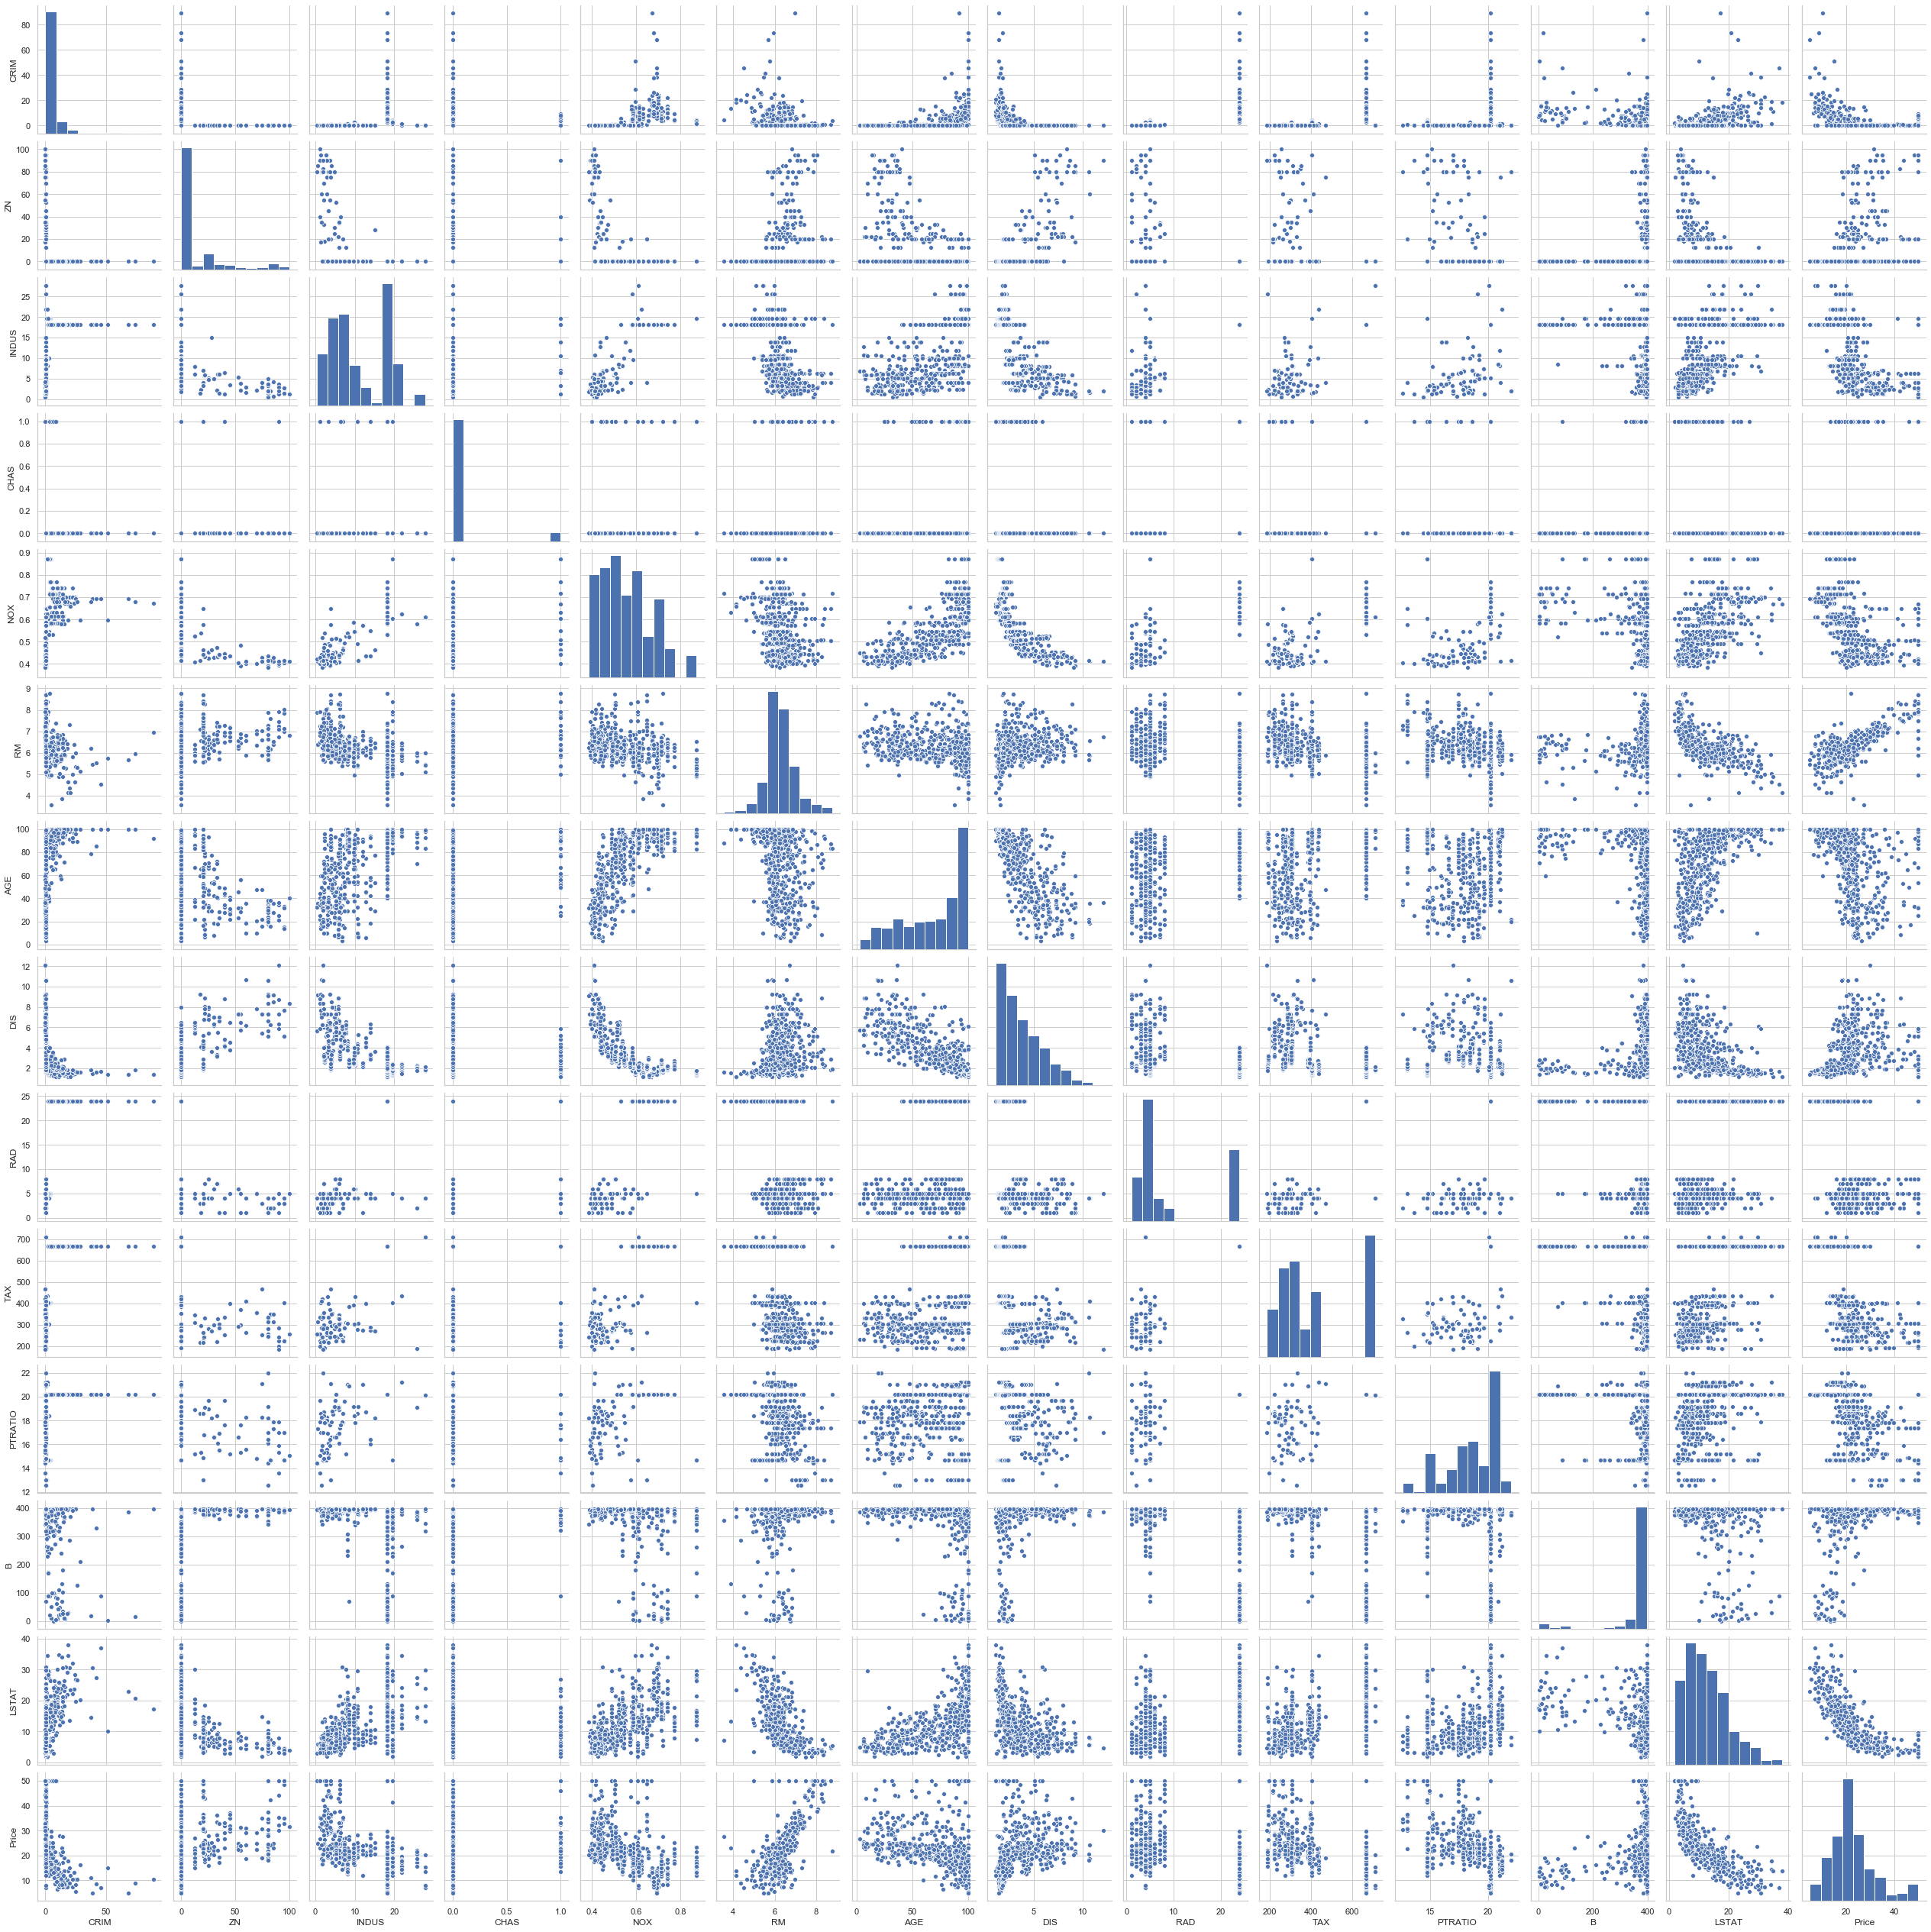

Wall time: 34.3 s


In [28]:
%%time
sns.pairplot(data)
plt.show()

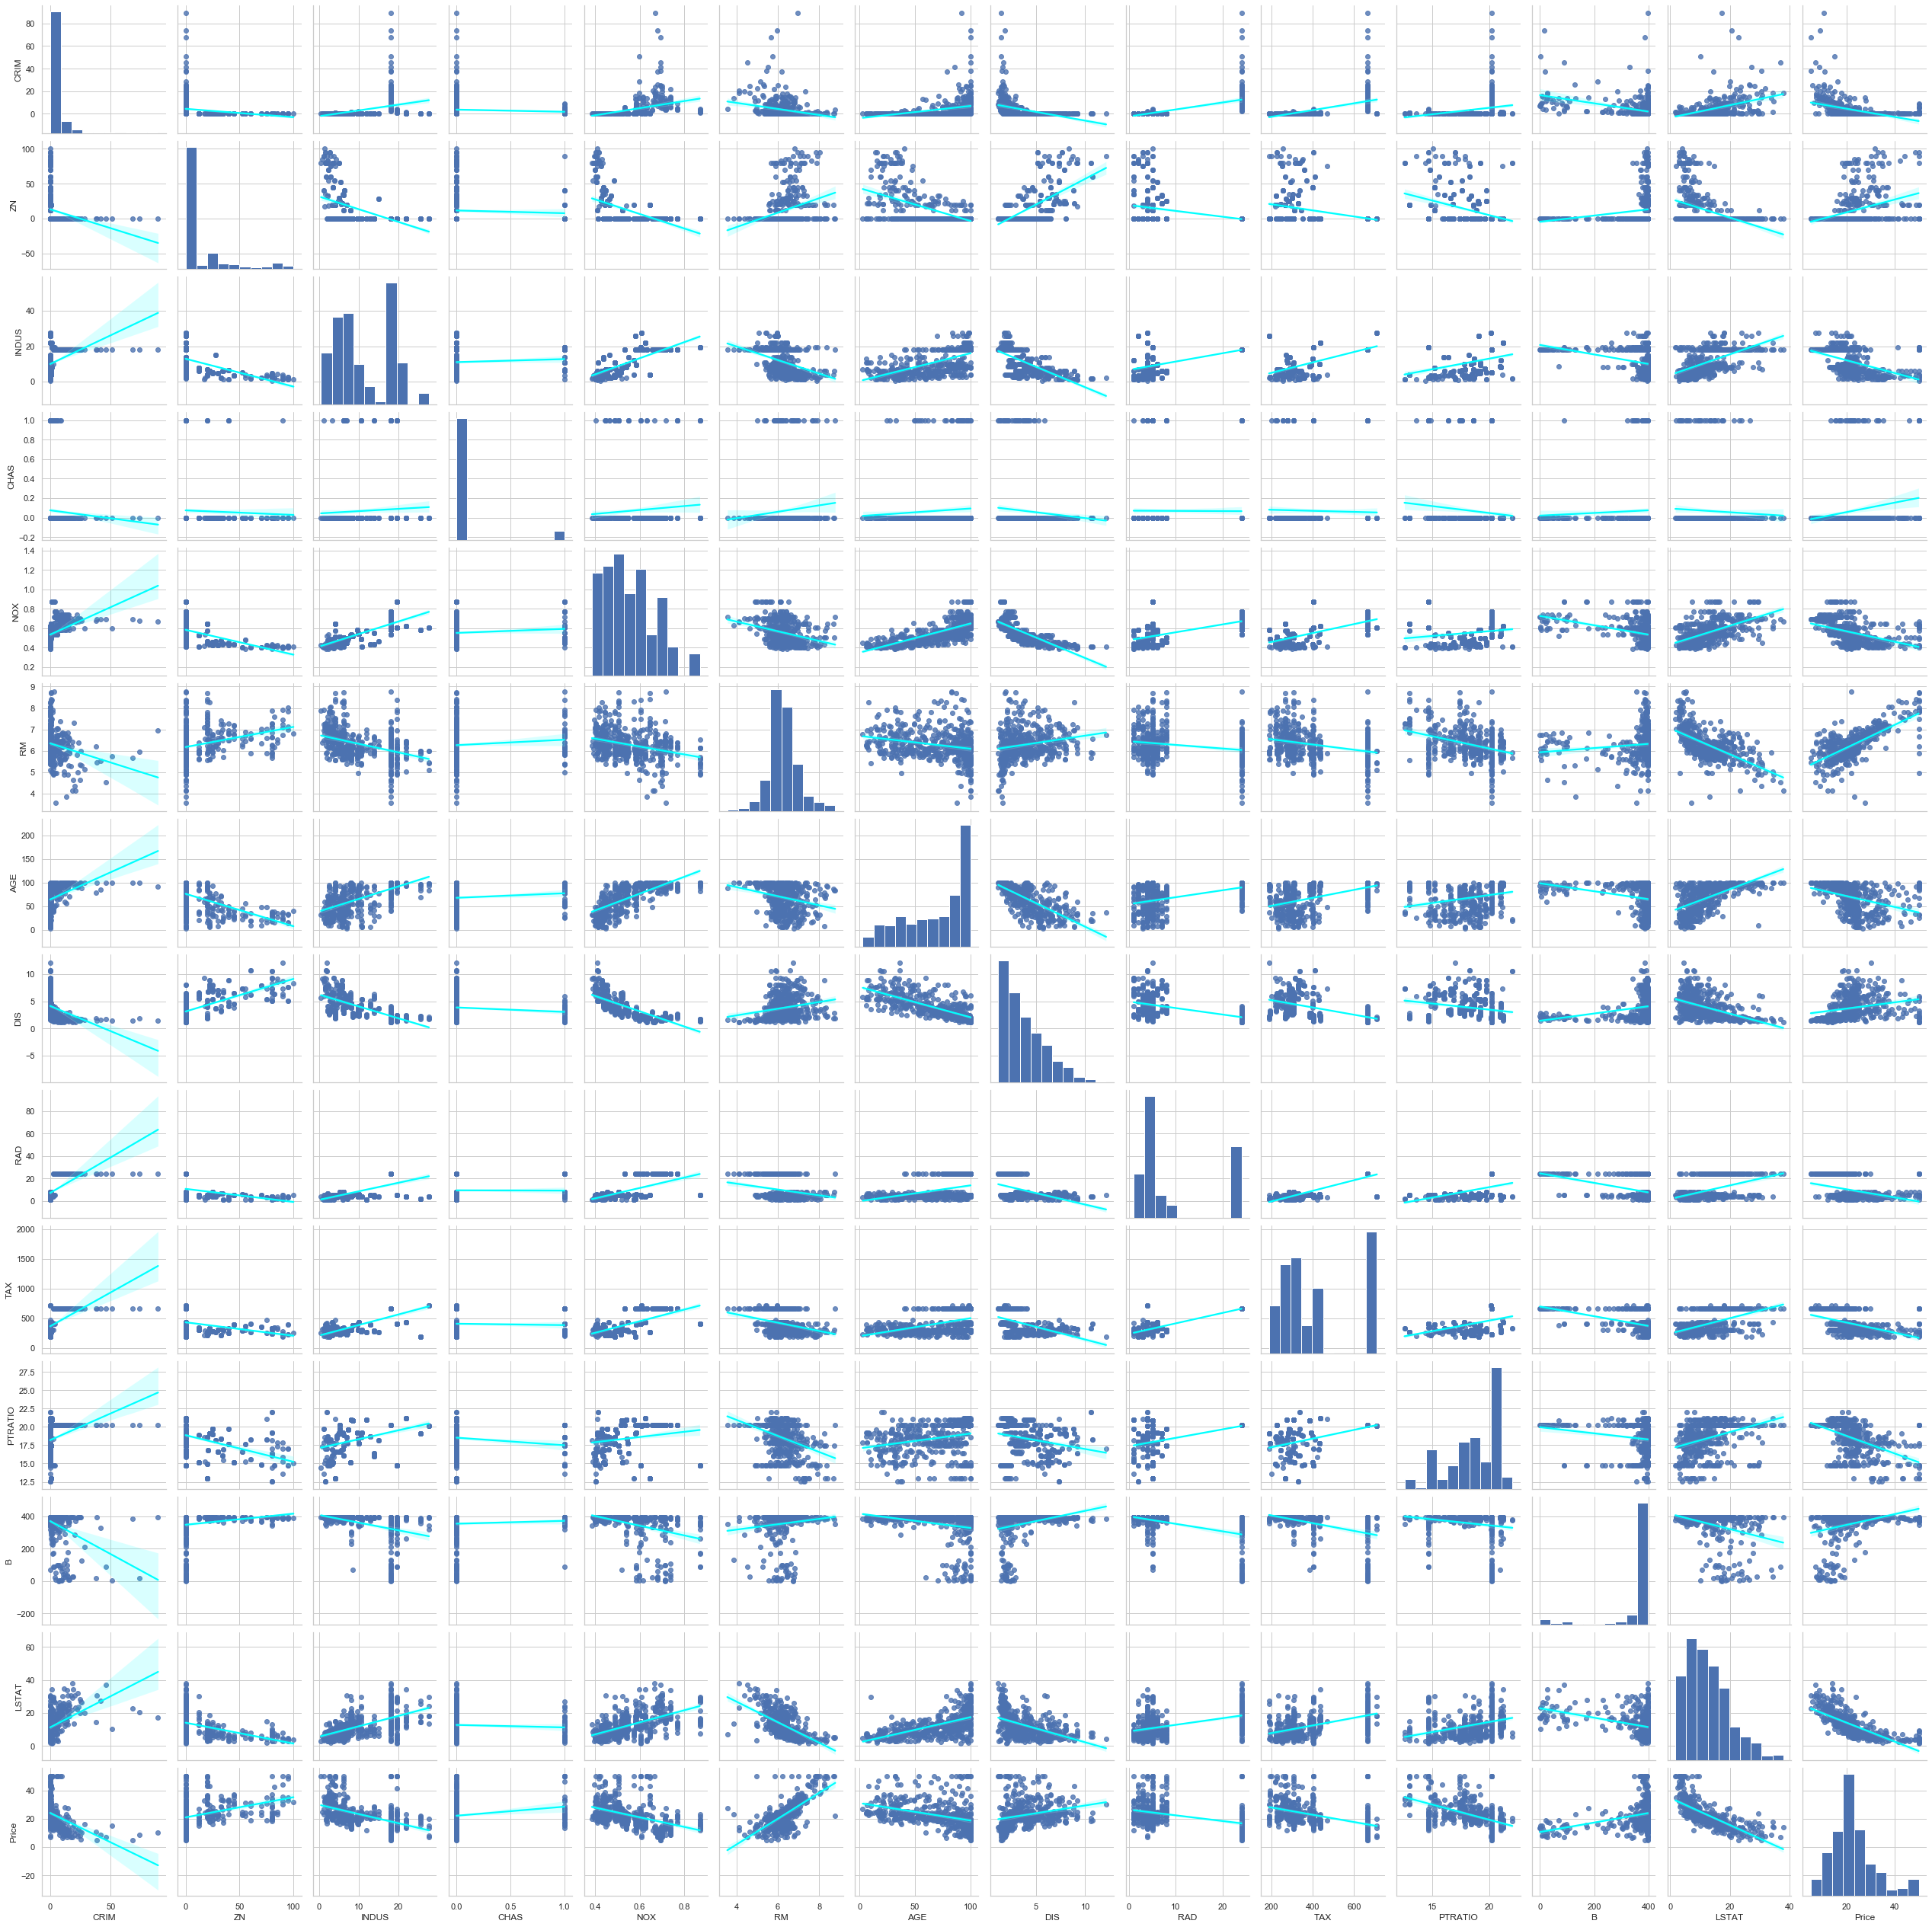

Wall time: 50.5 s


In [29]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training y Testing Dataset

In [30]:
prices = data['Price']
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10 )

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Intercepto: ',regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coeficientes'])

Intercepto:  36.53305138282418


,Coeficientes
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [33]:
print("Rquadrado para training ",regr.score(X_train,y_train))
print("Rquadrado para testing ",regr.score(X_test,y_test))

Rquadrado para training  0.750121534530608
Rquadrado para testing  0.6709339839115636


# Data Transformations

In [34]:
data["Price"].skew()

1.1080984082549072

In [35]:
y_log = np.log(data["Price"])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: Price, dtype: float64

In [36]:
prices = np.log(data['Price'])
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10 )

In [37]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Intercepto: ',regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coeficientes'])

Intercepto:  4.059943871775182


,Coeficientes
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [38]:
print("Rquadrado para training ",regr.score(X_train,y_train))
print("Rquadrado para testing ",regr.score(X_test,y_test))

Rquadrado para training  0.7930234826697584
Rquadrado para testing  0.7446922306260724


In [39]:
np.e**0.080331

1.0836456950439142

## Valores p

In [40]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

results.params

c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [41]:
pd.DataFrame({'Coeficiente':results.params, 'Valor p':round(results.pvalues,3)})

,Coeficiente,Valor p
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Pruebas para multicolinearidad

In [42]:
vif = []
for i in range(X_incl_const.columns.size):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

pd.DataFrame({'coef_name':X_incl_const.columns,
             'vif':np.round(vif,2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Simplificacion del modelo

In [43]:
X_incl_const = sm.add_constant(X_train)


model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p value': round(results.pvalues, 3)})

print('BIC es ', results.bic)
print('R cuadrado es ', results.rsquared)


BIC es  -139.74997769478898
R cuadrado es  0.7930234826697584


In [44]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef_Indus = pd.DataFrame({'coef': results.params, 'p value': round(results.pvalues, 3)})

print('BIC es ', results.bic)
print('R cuadrado es ', results.rsquared)


BIC es  -145.14508855591163
R cuadrado es  0.7927126289415163


In [45]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS","AGE"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef_ageIndus = pd.DataFrame({'coef': results.params, 'p value': round(results.pvalues, 3)})

print('BIC es ', results.bic)
print('R cuadrado es ', results.rsquared)


BIC es  -149.49934294224678
R cuadrado es  0.7918657661852815


## Residuales 

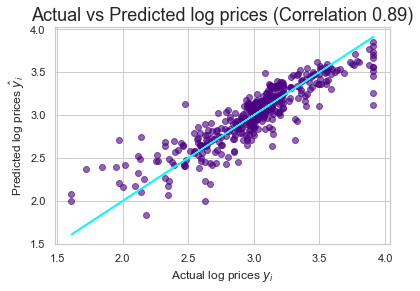

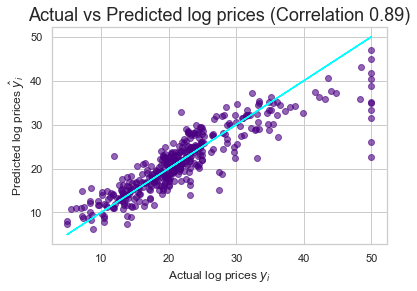

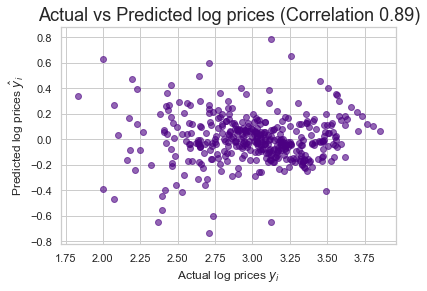

In [46]:
prices = np.log(data['Price'])
features = data.drop(['Price','INDUS','AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Residuals

corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c="indigo", alpha=0.6 )

plt.xlabel('Actual log prices $y _i$')
plt.ylabel('Predicted log prices $\hat y _i$')
plt.title(f'Actual vs Predicted log prices (Correlation {corr})', fontsize=18)
plt.plot(y_train, y_train, color='cyan')

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c="indigo", alpha=0.6 )

plt.xlabel('Actual log prices $y _i$')
plt.ylabel('Predicted log prices $\hat y _i$')
plt.title(f'Actual vs Predicted log prices (Correlation {corr})', fontsize=18)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')


plt.show()

plt.scatter(x=results.fittedvalues, y=results.resid, c="indigo", alpha=0.6 )

plt.xlabel('Actual log prices $y _i$')
plt.ylabel('Predicted log prices $\hat y _i$')
plt.title(f'Actual vs Predicted log prices (Correlation {corr})', fontsize=18)


plt.show()

results_log_mse = round(results.mse_resid, 3)
results_log_rsquared = round(results.rsquared, 3)

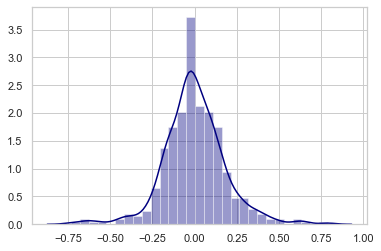

In [47]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color="navy")
plt.show()

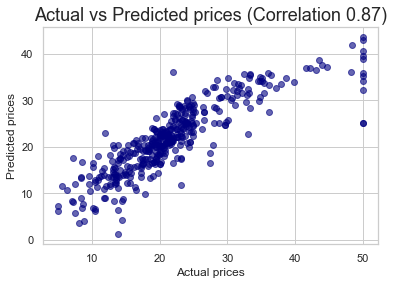

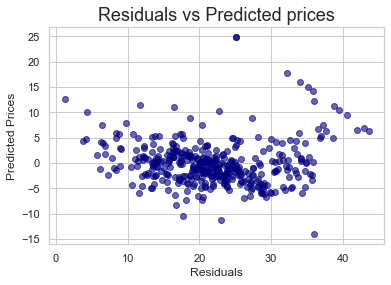

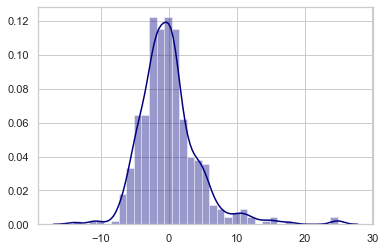

In [48]:
prices = data['Price']
features = data.drop(['Price','INDUS','AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

#Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Residuals

corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.6 )

plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title(f'Actual vs Predicted prices (Correlation {corr})', fontsize=18)


plt.show()

plt.scatter(x=results.fittedvalues, y=results.resid, c="navy", alpha=0.6 )
plt.xlabel('Residuals')
plt.ylabel('Predicted Prices')
plt.title('Residuals vs Predicted prices', fontsize=18)



plt.show()

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color="navy")
plt.show()

results_mse = round(results.mse_resid, 3)
results_rsquared = round(results.rsquared, 3)

In [49]:
pd.DataFrame({'MSE': [results_log_mse, results_mse], 
              'RSquared': [results_log_rsquared, results_rsquared],
             'RMSE': np.sqrt([results_log_mse, results_mse])},
            index=["Log Results","Normal Results"])

,MSE,RSquared,RMSE
Log Results,0.035,0.792,0.187083
Normal Results,19.884,0.749,4.459148


In [50]:
predicted_value = np.log(30)

print('Rango superior de una prediccion de 30 es: ',
      predicted_value+2*np.sqrt(results_log_mse))
print('Rango superior de una prediccion de 30000 es: ',
      (np.e**(predicted_value+2*np.sqrt(results_log_mse))*1000))
print('Rango inferior de una prediccion de 30 es: ',
      predicted_value-2*np.sqrt(results_log_mse))
print('Rango inferior de una prediccion de 30000 es: ',
      (np.e**(predicted_value-2*np.sqrt(results_log_mse))*1000))

Rango superior de una prediccion de 30 es:  3.7753631203395495
Rango superior de una prediccion de 30000 es:  43613.34233239937
Rango inferior de una prediccion de 30 es:  3.0270316429847615
Rango inferior de una prediccion de 30000 es:  20635.886906824155
